## Ceneo Analyzer

## Załadowanie bibliotek

In [70]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Lista kodow produktow, o ktorych zostaly pobrane opinie

In [71]:
print(*[filename.split(".")[0] for filename in os.listdir("opinions")], sep="\n")

111494944
123349750
39562616


## Wczytanie od uzytkownika kodu produktu 

In [72]:
product_id = input("Podaj kod produktu:")
#39562616

## Wczytanie do oboiektu panda.DataFrame opinii o produkcie o podanym kodzie

In [83]:
opinions = pd.read_json(f"opinions/{product_id}.json", )
opinions.star = opinions.star.apply(lambda s: s.split("/")[0].replace(",",".")).astype(float)
opinions.recommendation = recommendation_distribution.apply(lambda r: "Brak rekomendacji" if r is None else r)


## Podstawowe statystyki

In [74]:
opinions.star = opinions.star.apply(lambda s: s.split("/")[0].replace(",",".")).astype(float)
opinions.recommendation = recommendation_distribution.apply(lambda r: "Brak rekomendacji" if r is None else r)

In [75]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros.apply(lambda p: None if not p else p).count()
cons_count = opinions.cons.apply(lambda c: None if not c else c).count()
average_stars = opinions.star.mean()
print(pros_count)
print(cons_count)
print(average_stars)

4
0
4.25


## Histogram częstoći poszczególnych ocen produktu


star
0.0    0
0.5    0
1.0    1
1.5    0
2.0    0
2.5    0
3.0    1
3.5    0
4.0    1
4.5    1
5.0    6
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '0.5'),
  Text(2, 0, '1.0'),
  Text(3, 0, '1.5'),
  Text(4, 0, '2.0'),
  Text(5, 0, '2.5'),
  Text(6, 0, '3.0'),
  Text(7, 0, '3.5'),
  Text(8, 0, '4.0'),
  Text(9, 0, '4.5'),
  Text(10, 0, '5.0')])

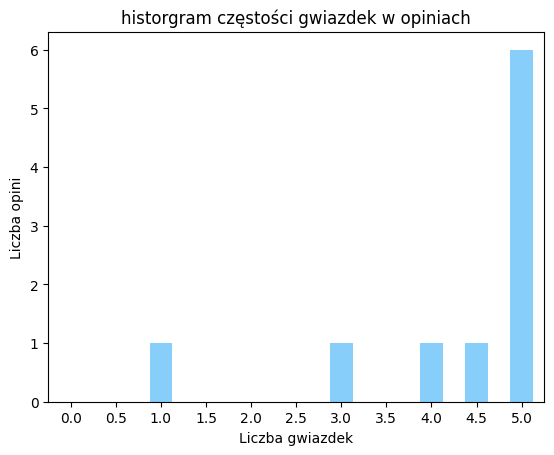

In [77]:
stars_distribution.plot.bar(color="lightskyblue")
plt.title("historgram częstości gwiazdek w opiniach")
plt.xlabel("Liczba gwiazdek")
plt.ylabel("Liczba opini")
plt.xticks(rotation=0)

## Udział poszczególnych  rekomendacji w ogólnej liczbie opinii


In [78]:
recommendation_distribution = opinions.recommendation.value_counts(dropna=False).reindex(["Polecam","Brak rekomendacji", "Nie polecam"],fill_value = 0)
recommendation_distribution

recommendation
Polecam             NaN
Brak rekomendacji   NaN
Nie polecam         NaN
Name: count, dtype: float64

In [84]:
recommendation_distribution.plot.pie(
    colors = ["forestgreen", "gold", "crimson"],
    label = "",
    autopct = "%1.1f%%"
)
plt.title("Udział rekomendacji w opiniach")


d:\WebScraper\.venv\Lib\site-packages\matplotlib\axes\_axes.py:3232: RuntimeWarning: invalid value encountered in divide
  x = x / sx


ValueError: cannot convert float NaN to integer

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 640x480 with 1 Axes>

In [ ]:
opinions

,opinion_id,author,recommendation,star,content,pros,cons,helpful,unhelpful,publish_date,purchase_date
0,16086313,s...j,Polecam,4.0,Po 20 minutach koszenia nie można było uruchom...,"[moc, trwałość, wyposażenie]",[],7,0,2022-05-14 23:46:00,2022-04-11 17:40:22
1,16250174,j...a,Polecam,4.5,"Bardzo fajny traktorek. Dobra zwrotność, szybk...",[],[],4,2,2022-06-25 09:30:35,2022-06-13 09:40:09
2,17576363,d...1,Polecam,5.0,Traktorek pierwsza klasa. Do naszego ogrodu ok...,[],[],1,1,2023-06-02 19:56:08,2023-05-15 15:39:19
3,16166008,Jolanta,Polecam,5.0,"Sprzęt nowy więc jak na razie jest super, zoba...",[],[],1,0,2022-06-03 08:15:18,2022-05-16 20:13:54
4,16217794,p...z,Polecam,5.0,"Jeździ do przodu, czasem do tyłu. Kosi, spełni...","[moc, trwałość, wyposażenie]",[],1,0,2022-06-16 20:39:37,2022-05-24 20:51:50
5,16150668,k...l,Polecam,5.0,"Sprzęt nowy ,sprawuje się super,zobaczymy co b...","[moc, trwałość, wyposażenie]",[],1,0,2022-05-31 10:26:59,2022-05-16 20:56:23
6,17530925,a...z,Polecam,5.0,Wszystko super. zgodnie z moimi oczekiwaniami,"[moc, trwałość, wyposażenie]",[],3,1,2023-05-21 08:24:09,2023-05-01 22:27:06
7,17471142,d...a,Polecam,5.0,Wydaje się być ok jak na dwa tygodnie użytkowa...,[],[],1,3,2023-05-04 08:39:08,2023-04-16 10:32:40
8,18163995,p...4,None,3.0,"Zakupiłem sprzęt we wtorek, dziś mamy piątek a...",[],[],0,2,2023-12-01 20:35:07,2023-11-28 12:42:29
9,16118979,b...4,Nie polecam,1.0,Dramat. Otrzymałem uszkodzony sprzęt. Teraz po...,[],[],2,1,2022-05-23 21:43:58,2022-05-11 21:56:03
